In [1]:
from itertools import product

import matplotlib.pyplot as plt
import pandas as pd
import pyprojroot
import seaborn as sns

In [2]:
SOURCE_DATA_ROOT = pyprojroot.here().joinpath('results/VSD/source_data')

FIGURES_ROOT = pyprojroot.here('docs/paper/figures/experiment-2')

In [3]:
all_test_results_df = pd.read_csv(SOURCE_DATA_ROOT.joinpath('all_test_results.csv'))

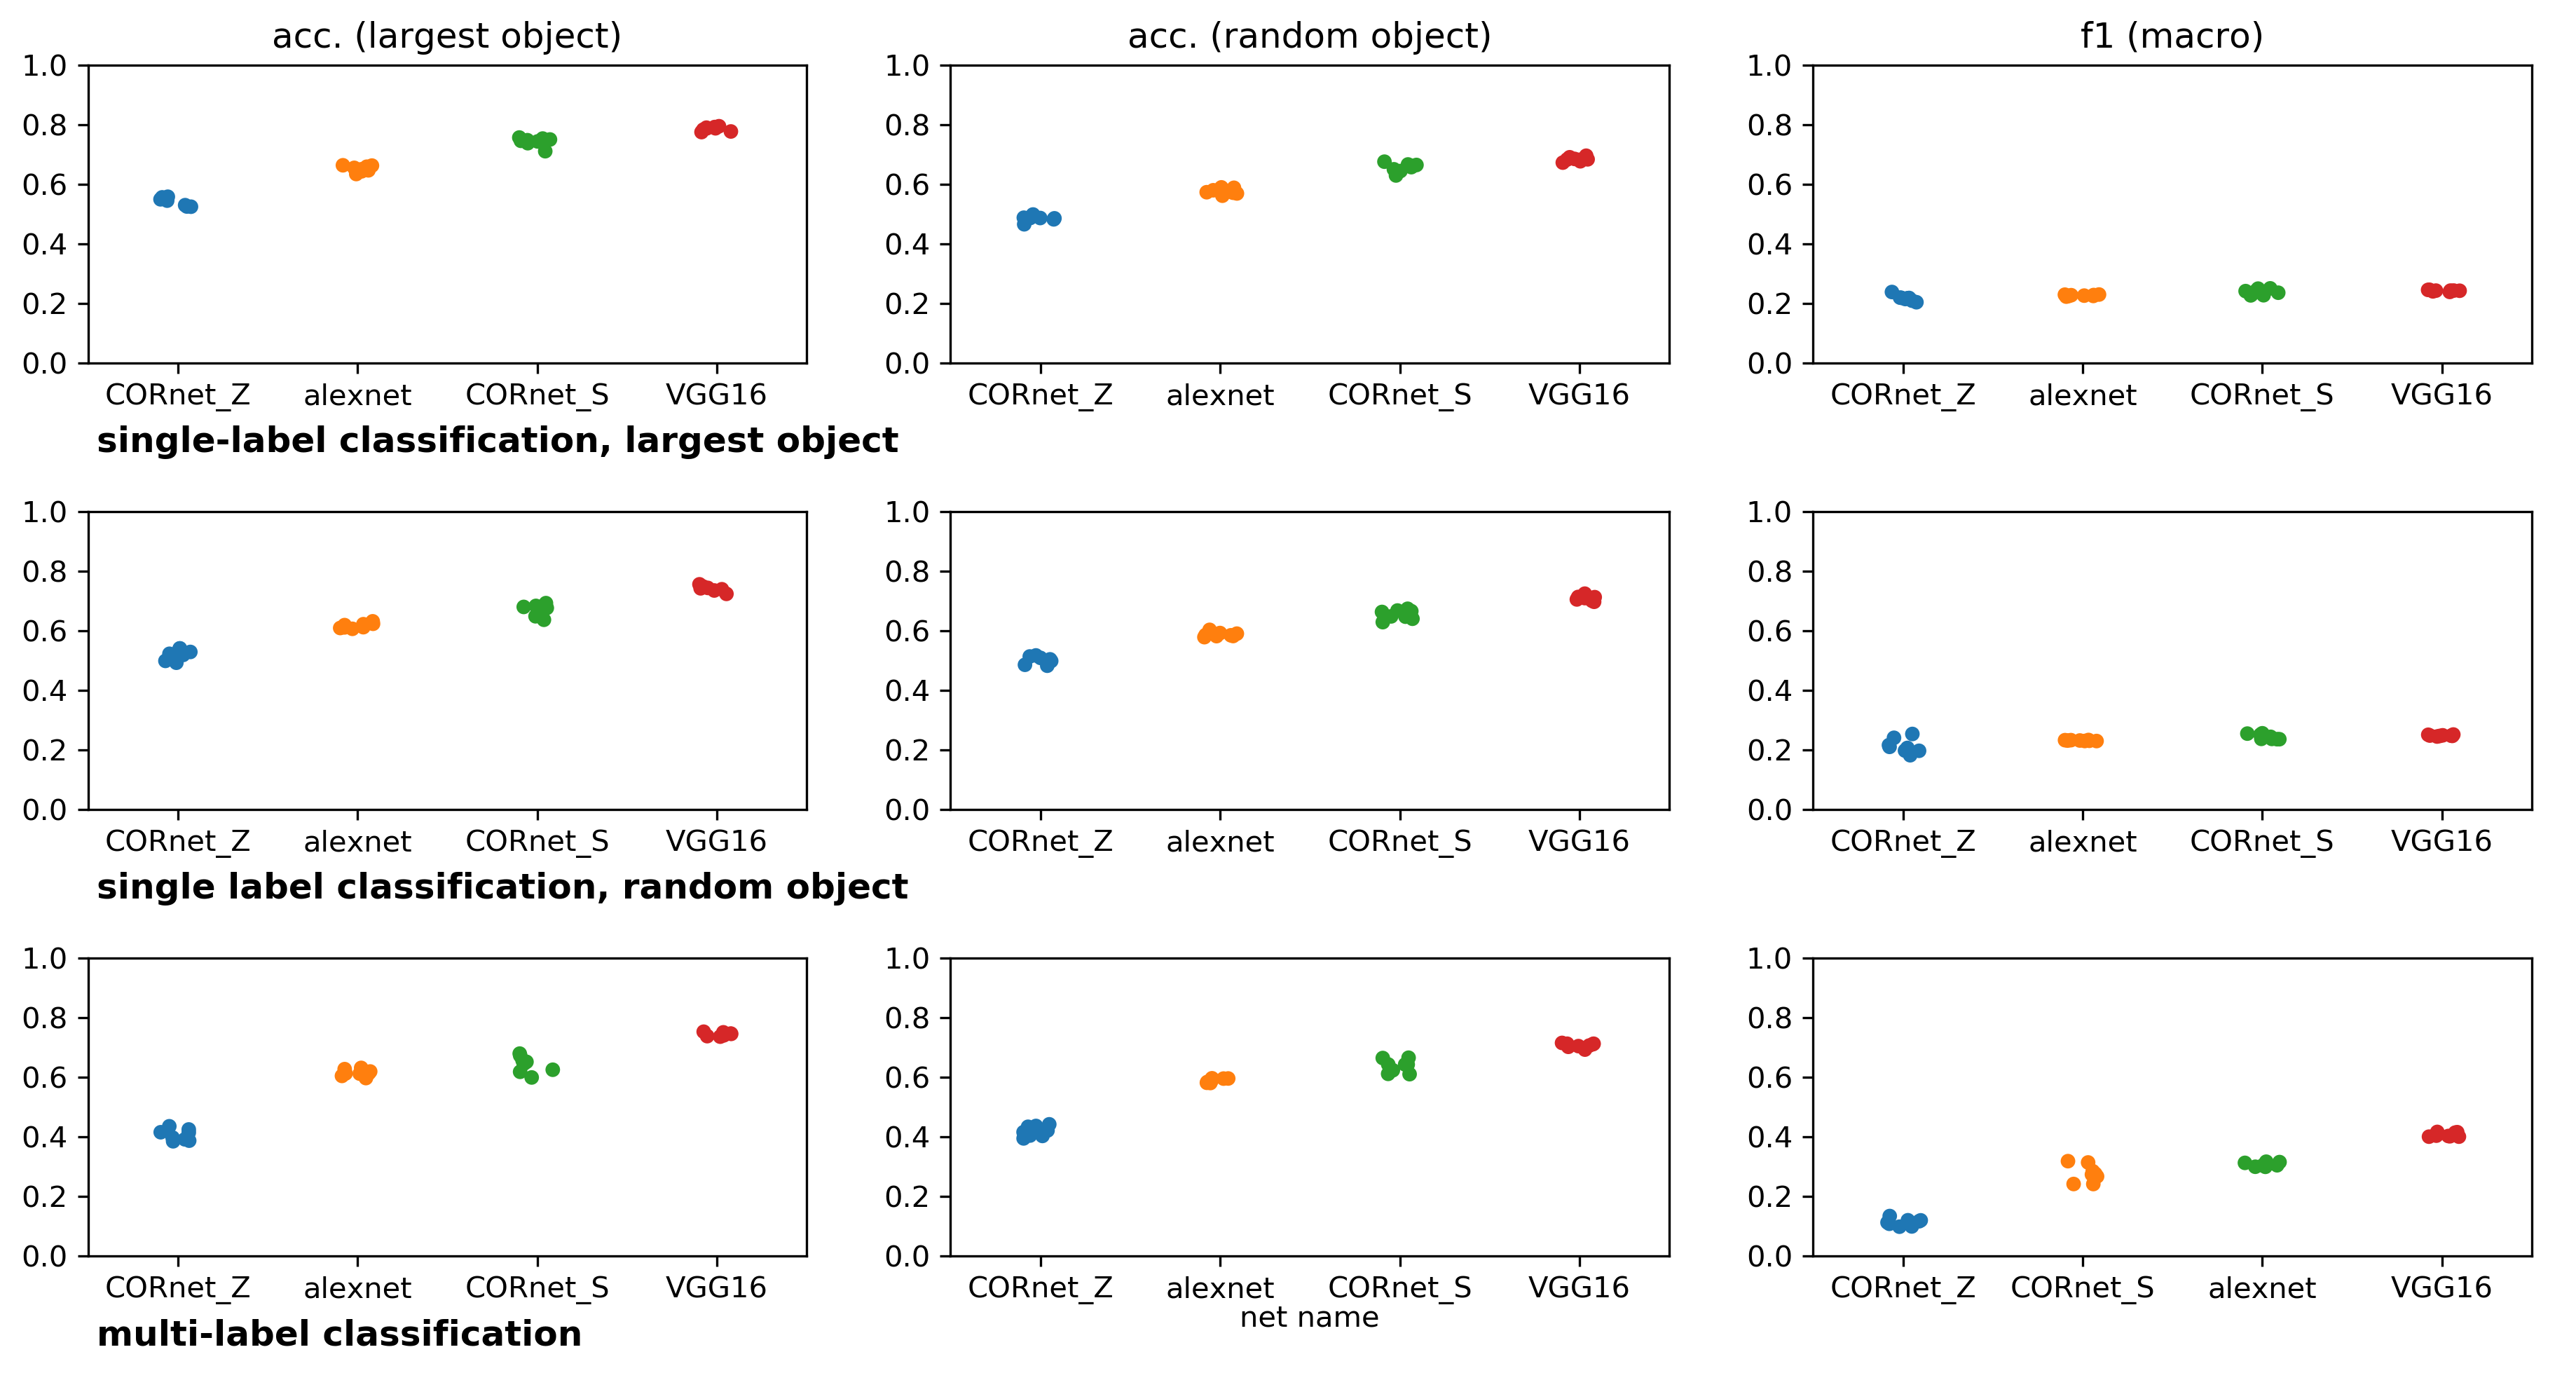

In [5]:
METHODS = ['transfer']
LOSS_FUNCS = ['CE-largest', 'CE-random', 'BCE']
LOSS_FUNC_ML_TASK_MAP = {
    'CE-largest': 'single-label classification, largest object',
    'CE-random': 'single label classification, random object',
    'BCE': 'multi-label classification',
}

rows = list(product(METHODS, LOSS_FUNCS))

n_rows = len(rows)

columns = ['acc_largest', 'acc_random', 'f1']
METRIC_TITLE_MAP = {
    'acc_largest': 'acc. (largest object)',
    'acc_random': 'acc. (random object)',
    'f1': 'f1 (macro)'
}

n_cols = len(METRICS)

FIGSIZE = (15, 7.5)
DPI = 300

LABELSIZE = 6
XTICKPAD = 2
YTICKPAD = 1

fig, ax = plt.subplots(n_rows, n_cols, figsize=FIGSIZE, dpi=DPI)
fig.subplots_adjust(hspace=0.5)

for row_ind, row in enumerate(rows):
    method, loss_func = row[0], row[1]
    row_df = all_test_results_df[(all_test_results_df['method'] == method) & (all_test_results_df['loss_func'] == loss_func)]
    for col_ind, metric in enumerate(columns):
        row_df_sorted = row_df.sort_values(by=metric)
        sns.stripplot(x='net_name', y=metric, data=row_df_sorted, ax = ax[row_ind, col_ind])
        ax[row_ind, col_ind].set_ylim([0, 1])

        # add titles on top row
        if row_ind == 0:
            ax[row_ind, col_ind].set_title(METRIC_TITLE_MAP[metric])

        # add "ML task" as y-label for first column
        if col_ind == 0:
            ax[row_ind, col_ind].text(-0.45, -0.3, LOSS_FUNC_ML_TASK_MAP[loss_func], fontweight='bold', fontsize=12)

        ax[row_ind, col_ind].set_ylabel('')
        ax[row_ind, col_ind].set_xlabel('')
            
# add a big axis, hide frame
big_ax = fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
big_ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
big_ax.grid(False)
big_ax.set_xlabel("net name", labelpad=0.1);

for ext in ('svg', 'png'):
    fig_path = FIGURES_ROOT.joinpath(
        f'test-results/test-results.{ext}'
    )
    plt.savefig(fig_path)